In [20]:
# Importing the libraries

import cv2

In [29]:
# Loading the cascades

path = "/content/drive/MyDrive/ARMY/learn-ai/computerVision/Module 1 - Face Recognition"
face_cascade = cv2.CascadeClassifier(path + "/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(path + "/haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier(path + "/haarcascade_smile.xml")

In [44]:
# Defining a function that will do the detections

def detect(gray, frame):
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.1, 50)
    for (sx, sy, sw, sh) in smiles:
      cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
  return frame

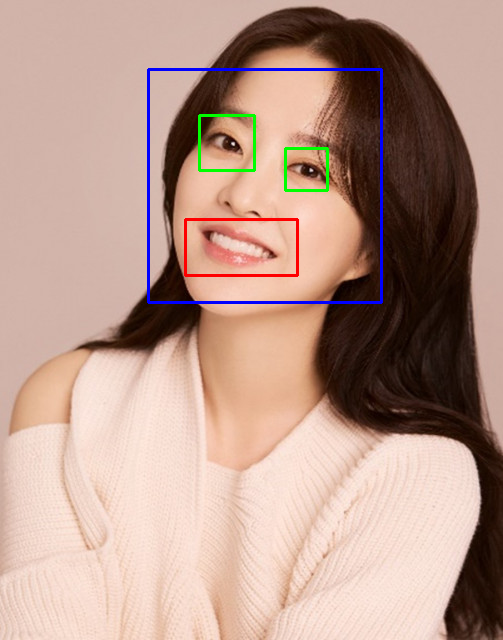

In [45]:
# Doing some Face Recognition with the image

from google.colab.patches import cv2_imshow
path = "/content/drive/MyDrive/ARMY/learn-ai/computerVision/Module 1 - Face Recognition"
frame = cv2.imread(path + "/박보영.jpg", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
canvas = detect(gray, frame)
cv2_imshow(canvas)

In [ ]:
# Doing some Face Recognition with the webcam

video_capture = cv2.VideoCapture(0)
while True:
  _, frame = video_capture.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  canvas = detect(gray, frame)
  cv2.imshow("Video", canvas)
  if cv2.waitKey(1) & 0xFF == ord("q"):
    break
video_capture.release()
cv2.destroyAllWindows()